# IMPORT LIBRARY

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage
from skimage import data
from skimage.color import rgb2hsv
from skimage.feature import graycomatrix, graycoprops

# Baca gambar dari file

In [2]:
img = cv2.imread('1.jpg')

# menampilkan gambar dari variabel img dalam window terpisah

In [3]:
cv2.imshow("gambar parkir", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# konversi gambar img menjadi gray dan melakukan deteksi tepi menggunakan Canny

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(img, 100, 150)

# menampilkan gambar dari variabel img dalam window terpisah

In [5]:
cv2.imshow("gambar parkir", edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

# menampilkan gambar dalam plot

Text(0.5, 1.0, 'gambar yang udah')

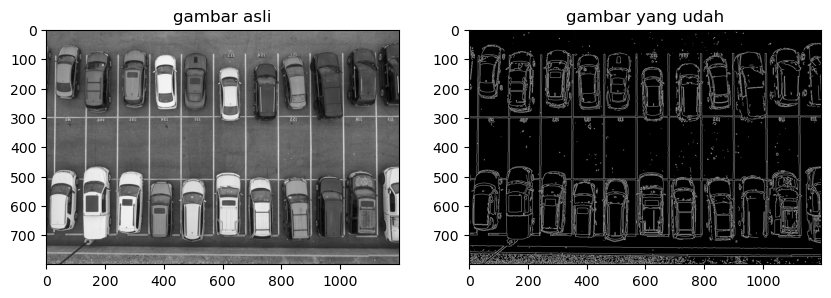

In [6]:
fig, axs = plt.subplots(1, 2, figsize = (10,10))
ax = axs.ravel()

ax[0].imshow(gray,cmap = "gray")
ax[0].set_title("gambar asli")

ax[1].imshow(edges,cmap = "gray")
ax[1].set_title("gambar yang udah")

# Menggunakan HoughLines untuk mendeteksi garis

In [7]:
lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=100, minLineLength=50, maxLineGap=10)
image_line = img.copy()

# Menggambar garis pada gambar

In [8]:
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(image_line, (x1, y1), (x2, y2), (0, 255, 0), 2)

# menampilkan gambar dalam plot

Text(0.5, 1.0, 'gambar yang udah')

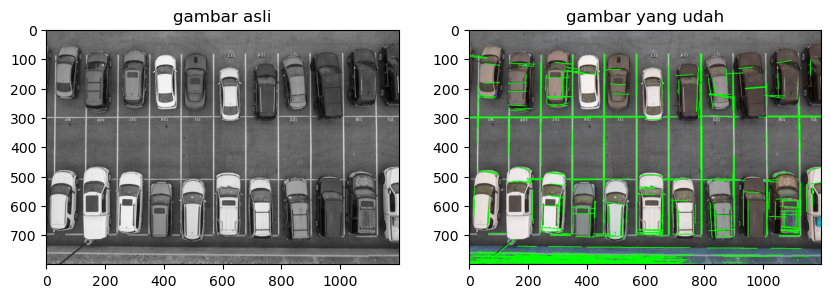

In [9]:
fig, axs = plt.subplots(1, 2, figsize = (10,10))
ax = axs.ravel()

ax[0].imshow(gray,cmap = "gray")
ax[0].set_title("gambar asli")

ax[1].imshow(image_line,cmap = "gray")
ax[1].set_title("gambar yang udah")

# membaca gambar dari data skimage dan konversi ke hsv menggunakan fungsi dari skimage

Text(0.5, 1.0, 'HSV')

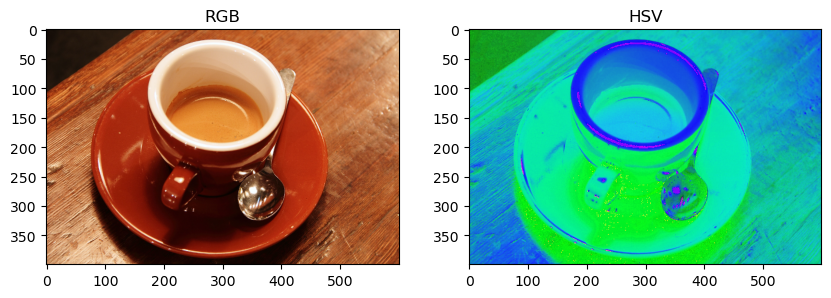

In [10]:
image = skimage.data.coffee ( )
img_hsv =  rgb2hsv(image)

fig, axs = plt.subplots(1, 2, figsize = (10, 10))

ax = axs.ravel()

ax[0].imshow(image)
ax[0].set_title("RGB")

ax[1].imshow(img_hsv, cmap="hsv")
ax[1].set_title("HSV")

# menghitung rata-rata dan dan standar deviasi dari gambar hsv

In [11]:
mean = np.mean(img_hsv.ravel())
std = np.std(img_hsv.ravel())

print(mean, std)

0.4684990654759933 0.35064790859628664


# Mengekstrak masing-masing channel

In [12]:
h_channel = (img_hsv[:, :, 0] * 255).astype(np.uint8)
s_channel = (img_hsv[:, :, 1] * 255).astype(np.uint8)
v_channel = (img_hsv[:, :, 2] * 255).astype(np.uint8)

# Menampilkan gambar asli dan masing-masing channel HSV dalam dua baris

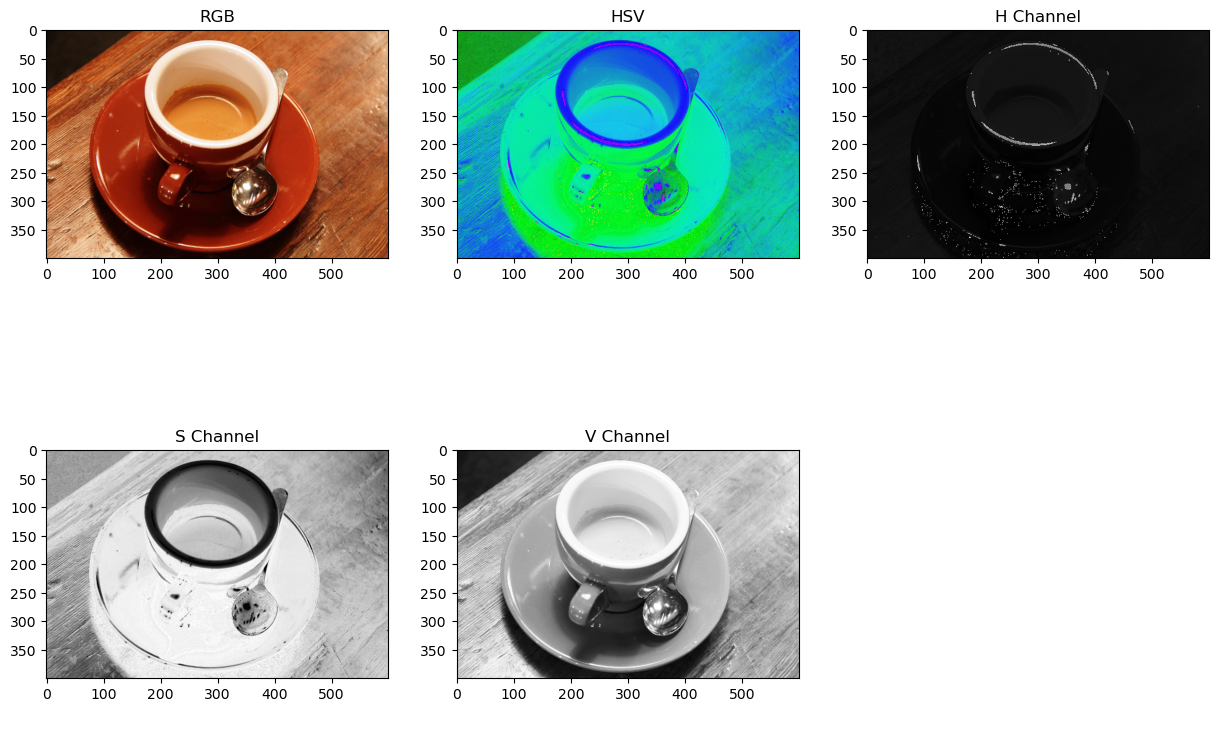

In [13]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
ax = axs.ravel()

ax[0].imshow(image)
ax[0].set_title("RGB")

ax[1].imshow(img_hsv, cmap="hsv")
ax[1].set_title("HSV")

ax[2].imshow(h_channel, cmap="gray")
ax[2].set_title("H Channel")

ax[3].imshow(s_channel, cmap="gray")
ax[3].set_title("S Channel")

ax[4].imshow(v_channel, cmap="gray")
ax[4].set_title("V Channel")

ax[5].axis('off')

plt.show()

# Menghitung GLCM dari masing-masing channel

In [14]:
glcm_h = graycomatrix(h_channel, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
glcm_s = graycomatrix(s_channel, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
glcm_v = graycomatrix(v_channel, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)

# Mengekstrasksi fitur dari GLCM untuk channel H

In [15]:
contrast_h = graycoprops(glcm_h, 'contrast')[0, 0]
dissimilarity_h = graycoprops(glcm_h, 'dissimilarity')[0, 0]
homogeneity_h = graycoprops(glcm_h, 'homogeneity')[0, 0]
energy_h = graycoprops(glcm_h, 'energy')[0, 0]
correlation_h = graycoprops(glcm_h, 'correlation')[0, 0]

print(f'Contrast H Channel: {contrast_h}')
print(f'Dissimilarity H Channel: {dissimilarity_h}')
print(f'Homogeneity H Channel: {homogeneity_h}')
print(f'Energy H Channel: {energy_h}')
print(f'Correlation H Channel: {correlation_h}')

Contrast H Channel: 337.9647621035059
Dissimilarity H Channel: 2.7067070116861442
Homogeneity H Channel: 0.5942268702599648
Energy H Channel: 0.11853059449105036
Correlation H Channel: 0.45428183895231705


# Mengekstrasksi fitur dari GLCM untuk channel S

In [16]:
contrast_s = graycoprops(glcm_s, 'contrast')[0, 0]
dissimilarity_s = graycoprops(glcm_s, 'dissimilarity')[0, 0]
homogeneity_s = graycoprops(glcm_s, 'homogeneity')[0, 0]
energy_s = graycoprops(glcm_s, 'energy')[0, 0]
correlation_s = graycoprops(glcm_s, 'correlation')[0, 0]

print(f'Contrast S Channel: {contrast_s}')
print(f'Dissimilarity S Channel: {dissimilarity_s}')
print(f'Homogeneity S Channel: {homogeneity_s}')
print(f'Energy S Channel: {energy_s}')
print(f'Correlation S Channel: {correlation_s}')

Contrast S Channel: 289.5154966611019
Dissimilarity S Channel: 9.438251252086811
Homogeneity S Channel: 0.19298265314241603
Energy S Channel: 0.01921834704570811
Correlation S Channel: 0.9513612935541177


# Mengekstrasksi fitur dari GLCM untuk channel V

In [17]:
contrast_v = graycoprops(glcm_v, 'contrast')[0, 0]
dissimilarity_v = graycoprops(glcm_v, 'dissimilarity')[0, 0]
homogeneity_v = graycoprops(glcm_v, 'homogeneity')[0, 0]
energy_v = graycoprops(glcm_v, 'energy')[0, 0]
correlation_v = graycoprops(glcm_v, 'correlation')[0, 0]

print(f'Contrast V Channel: {contrast_v}')
print(f'Dissimilarity V Channel: {dissimilarity_v}')
print(f'Homogeneity V Channel: {homogeneity_v}')
print(f'Energy V Channel: {energy_v}')
print(f'Correlation V Channel: {correlation_v}')

Contrast V Channel: 176.00779632721205
Dissimilarity V Channel: 7.062245409015026
Homogeneity V Channel: 0.2808130195829467
Energy V Channel: 0.024581015525638312
Correlation V Channel: 0.9778693813152206
